# USA Car Accidents EDA

check the conclusion at the end for summerized results

In [49]:
import numpy as np  
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#reading our dataset
df1= pd.read_csv(r'C:\Users\49163\Desktop\New folder\US_Accidents_Dec21_updated.csv')
pd.set_option('display.max_columns', None)
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [51]:
df1.shape

(2845342, 47)

In [52]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [53]:
df1.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [54]:
missing_value_count=df1.isnull().sum()
missing_value_count

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [55]:
#so in this data set we have 2.8 million accidents recorded with Severity ranged from 1 to 4
#we also have information about the exact location and time of event and weather and traffic condition for each event
#we dont have considerable missing values in key coloumns
#lets go make the start time more handy

In [56]:
df1['Start_Time'] = pd.to_datetime(df1['Start_Time'])
df1['End_Time'] = pd.to_datetime(df1['End_Time'])

In [57]:
df1['Year'] = df1['Start_Time'].dt.year

df1['Month'] = df1['Start_Time'].dt.month

df1['Weekday']= df1['Start_Time'].dt.weekday

df1['Hour'] = df1['Start_Time'].dt.hour

df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Hour
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,0
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2,0,5
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2,0,6
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2,0,6
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2,0,7


In [58]:
# I would also like to see how number of accidents has evolved through years.

<AxesSubplot:xlabel='Year', ylabel='count'>

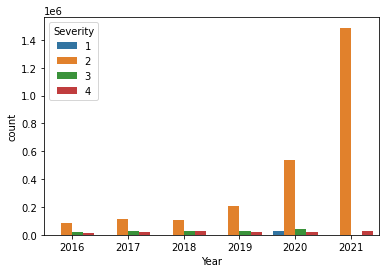

In [59]:
sns.countplot(x='Year', hue='Severity', data=df1 )

<AxesSubplot:xlabel='Weekday', ylabel='count'>

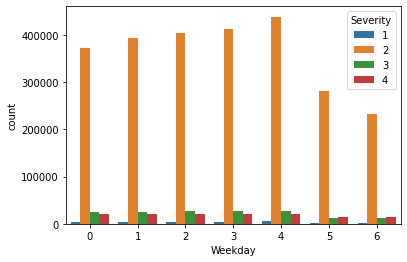

In [60]:
#let's do the same plot this time for days of the week to see how number of accidents vary during week
sns.countplot(x='Weekday', hue='Severity', data=df1 )

<AxesSubplot:xlabel='Hour', ylabel='count'>

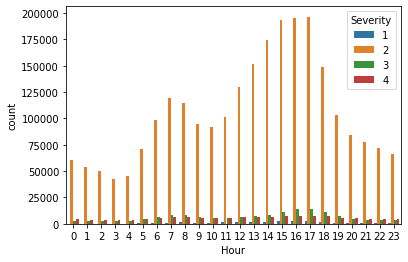

In [61]:
#apparently we have less car accidents during weekend , I say that's because ppl stay home or are not in rush
#now I would like to check how it evolves along one day
sns.countplot(x='Hour', hue='Severity', data=df1 )

In [62]:
#Okay!
#ppl should be more carful while driving back home from office

<AxesSubplot:xlabel='Nautical_Twilight', ylabel='count'>

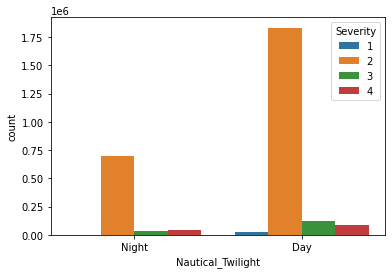

In [63]:
#I wonder if the darkness during night makes more accident lets check
sns.countplot(x='Nautical_Twilight', hue='Severity', data=df1 )

In [64]:
#well apparently not, or it can be also because ppl drive less in general during night
#like the whole thing is fewer so we have also less accidents

In [65]:
#I have this assumption that more sever accidents would take a longer time and I want to see if that's true
df1['Duration'] = (df1.End_Time - df1.Start_Time)

In [66]:
limit = 2840000
df = df1.iloc[0:limit:100, :]

In [67]:
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )

C:\Users\49163\AppData\Local\Temp/ipykernel_2588/4147802989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )


<AxesSubplot:xlabel='Severity', ylabel='Duration'>

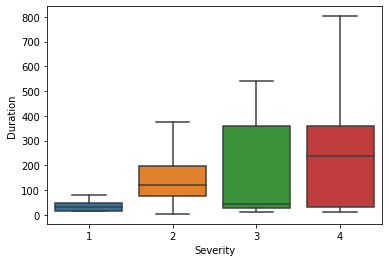

In [68]:
sns.boxplot(x="Severity", y='Duration' ,data=df,showfliers = False)

In [69]:
#we can say that it is true to some extent still from level 2 to 3 the avg duration decreases

In [70]:
#we can also study number of accidents in each state 

In [71]:
df5=df1.groupby('State').describe()
df5=df5['Severity']

In [72]:
df5=df5.sort_values(by='count',ascending=False)

In [73]:
df5.index[0:10]

Index(['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN', 'NC', 'SC'], dtype='object', name='State')

C:\Users\49163\AppData\Local\Temp/ipykernel_2588/1883965942.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(pie[0],labels=labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,


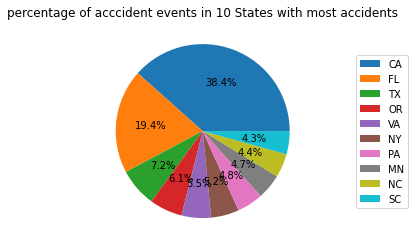

In [74]:
title = plt.title('percentage of acccident events in 10 States with most accidents')
pie = plt.pie(df5['count'][0:10], startangle=0,autopct='%1.1f%%')
labels=['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN', 'NC', 'SC']
plt.legend(pie[0],labels=labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

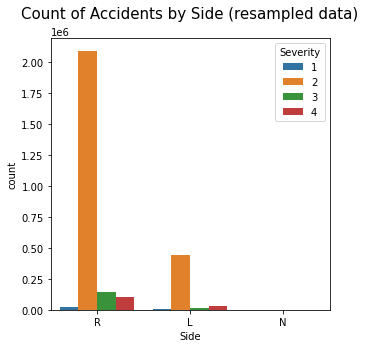

In [75]:
#there is another fun information sorted in this data and that is side let's see on which side of the road we have more events
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity', data=df1 )
plt.title("Count of Accidents by Side (resampled data)", size=15, y=1.05)
plt.show()

In [76]:
df1['Clear'] = np.where(df1['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df1['Cloud'] = np.where(df1['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df1['Rain'] = np.where(df1['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df1['Heavy_Rain'] = np.where(df1['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df1['Snow'] = np.where(df1['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df1['Heavy_Snow'] = np.where(df1['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df1['Fog'] = np.where(df1['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [77]:
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df1.loc[df1['Weather_Condition'].isnull(),i] = df1.loc[df1['Weather_Condition'].isnull(),'Weather_Condition']
    df1[i] = df1[i].astype('bool')

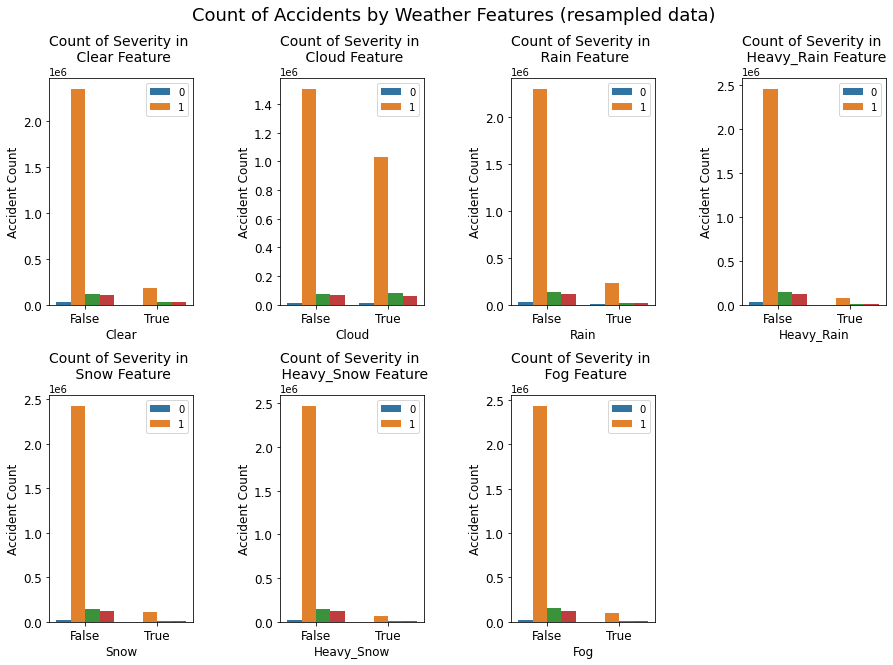

In [78]:
#lets see how weather condition effects the number of events
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity', data=df1 )
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

In [80]:
#so cloudy weather is perfect for accident

In [81]:
#let's make a map
world_map = folium.Map(location=[40, -100], zoom_start=4,tiles='Stamen Terrain')


In [82]:
limit = 2840000
df3 = df1.iloc[0:limit:10000, :]

In [83]:
df3['Severity'] = df3['Severity'].apply(str)

C:\Users\49163\AppData\Local\Temp/ipykernel_2588/3566731637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Severity'] = df3['Severity'].apply(str)


In [84]:
#now we define markers on it
incidents = folium.map.FeatureGroup()

hi="severity"
# add pop-up text to each marker on the map
latitudes = list(df3.Start_Lat)
longitudes = list(df3.Start_Lng)
labels = list(df.Severity)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label,tooltip=hi,icon=folium.Icon(color="green")).add_to(world_map)    
    
    
# add incidents to map
world_map.add_child(incidents)

In [85]:
#here is a map which gives location of accidents and their degree of severity

## conclusion

1.in this data set we have 2.8 million accidents recorded with Severity ranged from 1 to 4

2.we also have information about the exact location and time of event and weather and traffic condition for each event

3.we dont have considerable missing values in key coloumns

4.number of accident with severity 4 has considerably increased over the duration of data collection(2016 till 2022)

5.apparently we have less car accidents during weekend , I say that's because ppl stay home or are not in rush

6.ppl should be more carful while driving back home from office because most accidents happen between 15-17 pm

7.more accidents happen during day

8.more sever accidents have longer duration

9.'CA'and 'FL' states has most accidents respectively

10.we have more accidents in right handside of the road in comparison to left

11.cloudy weather is perfect for accident, nearly half of the events has happened in cloudy weather